# Pneumonia Detection

This project attempts to classify lung x-ray images into either a 'NORMAL' category for lungs without pneumonia or a 'PNEUMONIA' category for lungs with pneumonia.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

## Importing the training set

The training set is imported with ImageDataGenerator from the keras library.

In [44]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.05,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        brightness_range=(0.6, 1.0),
        horizontal_flip=True)


training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 5232 images belonging to 2 classes.


### Sampling from the training set
We look at the first 9 samples from the training set. These images have been subject to augmentation, this leads to a more robust Deep Learning model.
Augmentations applied:
1. shear_range=0.05
2. zoom_range=0.2
3. width_shift_range=0.1
4. height_shift_range=0.1
5. brightness_range=(0.6, 1.0)
6. horizontal_flip=True

In [64]:
x,y = training_set.next()

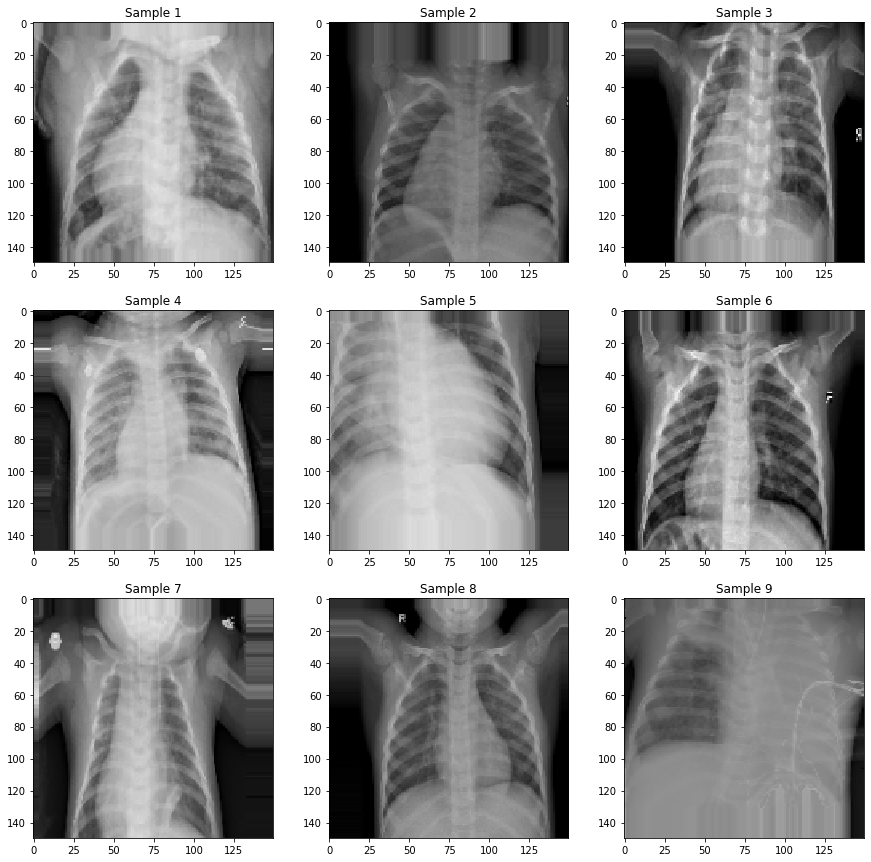

In [115]:
plt.figure(figsize=(15,15))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(x[i])
    plt.title(f'Sample {i}')
plt.show()

## Importing the test set

In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
        'test', 
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 623 images belonging to 2 classes.


## Training a CNN classifier

A Convolutional Neural Network is built and trained.

In [4]:
print("Classified as: ",training_set.class_indices)
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150,150,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units= 128, activation='relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units= 64, activation='relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units= 32, activation='relu'))
cnn.add(keras.layers.Dropout(0.4))
cnn.add(tf.keras.layers.Dense(units= 1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
cnn.fit(x = training_set, validation_data = test_set, epochs = 5)

Classified as:  {'NORMAL': 0, 'PNEUMONIA': 1}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/5
164/164 [==============================] - 167s 1s/step - loss: 0.5981 - accuracy: 0.7313 - val_loss: 0.6634 - val_accuracy: 0.6244
Epoch 2/5
164/164 [==============================] - 152s 925ms/step - loss: 0.4023 - accuracy: 0.8054 - val_loss: 0.3500 - val_accuracy: 0.8507
Epoch 3/5
164/164 [==============================] - 143s 869ms/step - loss: 0.3317 - accuracy: 0.8637 - val_loss: 0.3557 - val_accuracy: 0.8266
Epoch 4/5
164/164 [==============================] - 149s 906ms/step - loss: 0.3190 - accuracy: 0.8700 - val_loss: 0.6305 - val_accuracy: 0.7897
Epoch 5/5
164/164 [==============================] - 239s 1s/step - loss: 0.2833 - accuracy: 0.8851 - val_loss: 0.3990 - val_accuracy: 0.8507


#### The model is trained:
- Number of epochs: 5
- Optimizer used: Adam 
- Loss function used: 'binary crossentorpy'
#### Result:
The final validation accuracy achieved is 85%

## Plotting the learning curves

In [7]:
hist = cnn.history.history

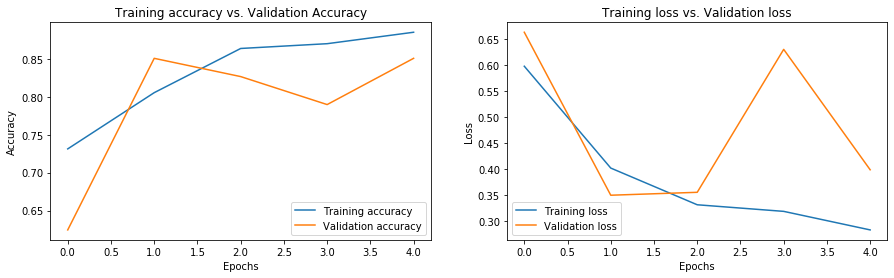

In [24]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(hist['accuracy'], label='Training accuracy')
plt.plot(hist['val_accuracy'], label='Validation accuracy')
plt.title('Training accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist['loss'], label='Training loss')
plt.plot(hist['val_loss'], label='Validation loss')
plt.title('Training loss vs. Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## Testing on a random unseen sample

In [12]:
from keras.preprocessing import image
test_image = image.load_img("pred/PN_test_true.jpeg", target_size = (150, 150))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'PNEUMONIA'
else:
  prediction = 'NORMAL'

print(prediction)

PNEUMONIA


### Save model as h5

In [9]:
cnn.save("pneumonia_model.h5")